In [1]:
import torch
import torch.utils.data as data

import os
import cv2
import numpy as np
import math
import random
import scipy
from scipy.ndimage.filters import gaussian_filter
import copy
import glob
# import sys
# sys.path

In [2]:
import torch
import torchvision
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch.optim as optim
import torchvision.transforms as standard_transforms

import numpy as np
import glob
import os

# from data_loader import Rescale
from data_loader import RescaleT
from data_loader import RandomCrop
from data_loader import ToTensor
from data_loader import ToTensorLab
from data_loader import SalObjDataset
from data_loader import Augment_prior
from data_loader import ColorJitter
from model import U2NET
from model import U2NETP

In [3]:
# from data_loader import Rescale
# from data_loader import RescaleT
# from data_loader import RandomCrop
# from data_loader import ToTensor
# from data_loader import ToTensorLab
# from data_loader import SalObjDataset
# from data_loader import Augment_prior

In [4]:
# ------- 2. set the directory of training dataset --------

model_name = 'u2netp' #'u2net' #'u2netp'
model_dir = os.path.join(os.getcwd(), 'saved_models', model_name, model_name + '.pth') # pretrained model dir

data_dir = os.path.join(os.getcwd(), 'train_data' + os.sep)
# tra_image_dir = os.path.join('DUTS', 'DUTS-TR', 'DUTS-TR', 'im_aug' + os.sep)
# tra_label_dir = os.path.join('DUTS', 'DUTS-TR', 'DUTS-TR', 'gt_aug' + os.sep)

# tra_image_dir = os.path.join('FINAL1_combined' + os.sep)
# tra_label_dir = os.path.join('FINAL1_MATTE' + os.sep)

tra_image_dir = os.path.join('test1_image' + os.sep)
tra_label_dir = os.path.join('test1_matte' + os.sep)

print("tra_image_dir", tra_image_dir)
print("tra_label_dir", tra_label_dir)

# image_ext = '.jpg'
image_ext = '.png'
label_ext = '.png'

# model_dir = os.path.join(os.getcwd(), 'saved_models', model_name + os.sep)
# model_dir = os.path.join('/home/xkaple00/JUPYTER_SHARED/Digis/Background_removal/U-2-Net/saved_models/u2net/u2net.pth')
model_dir = "./saved_models/u2netp/212000.pth"

# model_dir = os.path.join('/home/xkaple00/JUPYTER_SHARED/Digis/Background_removal/U-2-Net/saved_models/u2netp/u2netp.pth')

# model_dir = os.path.join('/home/xkaple00/JUPYTER_SHARED/Digis/Background_removal/U-2-Net/saved_models/u2net/u2net_bce_itr_2000_train_2.724735_tar_0.386822.pth')
# model_dir = os.path.join('/home/xkaple00/JUPYTER_SHARED/Digis/Background_removal/U-2-Net/saved_models/u2netp/11400.pth')


epoch_num = 100000
batch_size_train = 1
batch_size_val = 1
train_num = 0
val_num = 0

tra_img_name_list = glob.glob(data_dir + tra_image_dir + '*' + image_ext)

tra_lbl_name_list = []
for img_path in tra_img_name_list:
	img_name = img_path.split(os.sep)[-1]

	aaa = img_name.split(".")
	bbb = aaa[0:-1]
	imidx = bbb[0]
	for i in range(1,len(bbb)):
		imidx = imidx + "." + bbb[i]

	tra_lbl_name_list.append(data_dir + tra_label_dir + imidx + label_ext)

print("---")
print("train images: ", len(tra_img_name_list))
print("train labels: ", len(tra_lbl_name_list))
print("---")


train_num = len(tra_img_name_list)

salobj_dataset = SalObjDataset(
    img_name_list=tra_img_name_list,
    lbl_name_list=tra_lbl_name_list,
    transform=transforms.Compose([
        Augment_prior(0.95),
        RescaleT(320),
#         RandomCrop(288),
        ColorJitter(brightness=(0.9,1.1),contrast=(0.9,1.1),saturation=(0.9,1.1),hue=0.1),
        ToTensorLab(flag=0)]))
salobj_dataloader = DataLoader(salobj_dataset, batch_size=batch_size_train, shuffle=True, num_workers=1)

tra_image_dir test1_image/
tra_label_dir test1_matte/
---
train images:  1
train labels:  1
---


type_label <class 'numpy.ndarray'>
image_shape (400, 400, 3)
label_shape (400, 400, 1)
image_shape (400, 400, 3)
prior_shape (400, 400, 1)
label_shape (400, 400, 1)
inputs_shape torch.Size([1, 320, 320, 4])
labels_shape torch.Size([1, 320, 320, 1])
prior_shape torch.Size([320, 320, 1])
inputs_shape torch.Size([1, 320, 320, 4])


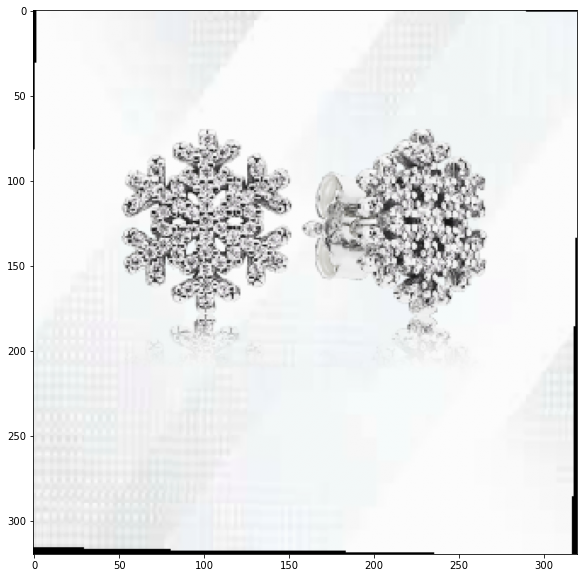

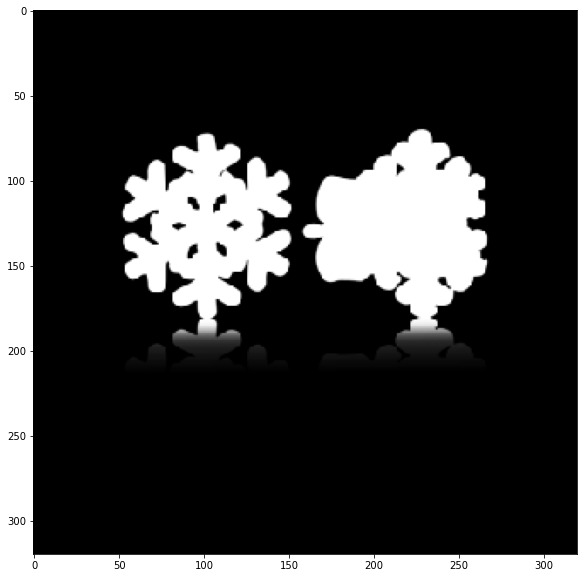

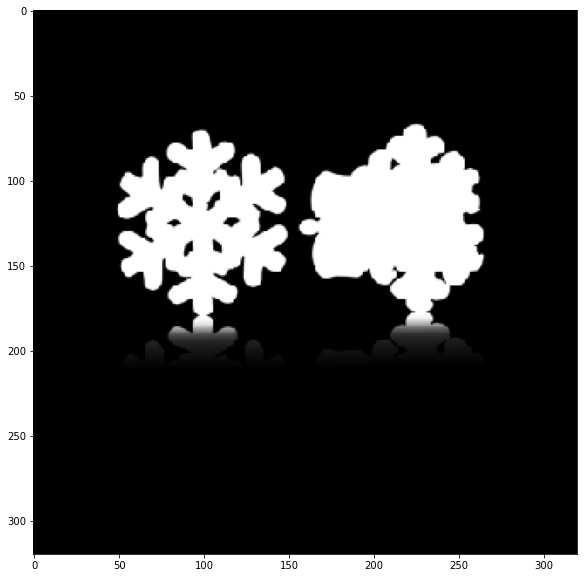

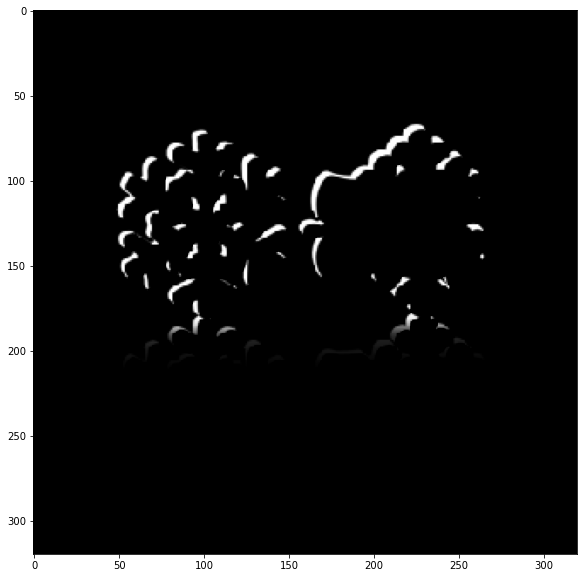

type_label <class 'numpy.ndarray'>
image_shape (400, 400, 3)
label_shape (400, 400, 1)
image_shape (400, 400, 3)
prior_shape (400, 400, 1)
label_shape (400, 400, 1)
inputs_shape torch.Size([1, 320, 320, 4])
labels_shape torch.Size([1, 320, 320, 1])
prior_shape torch.Size([320, 320, 1])
inputs_shape torch.Size([1, 320, 320, 4])


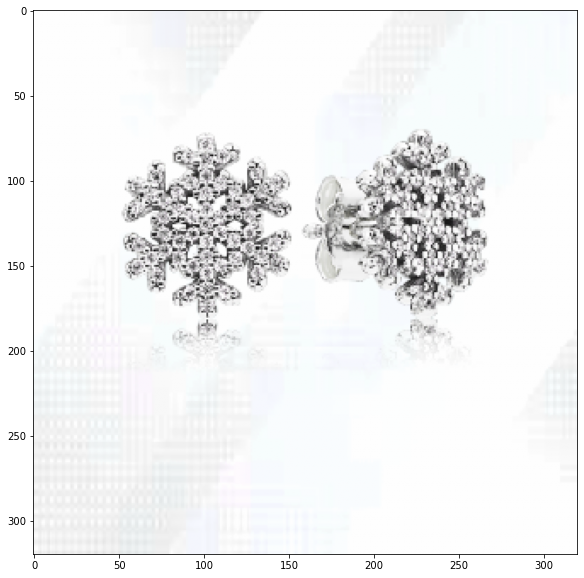

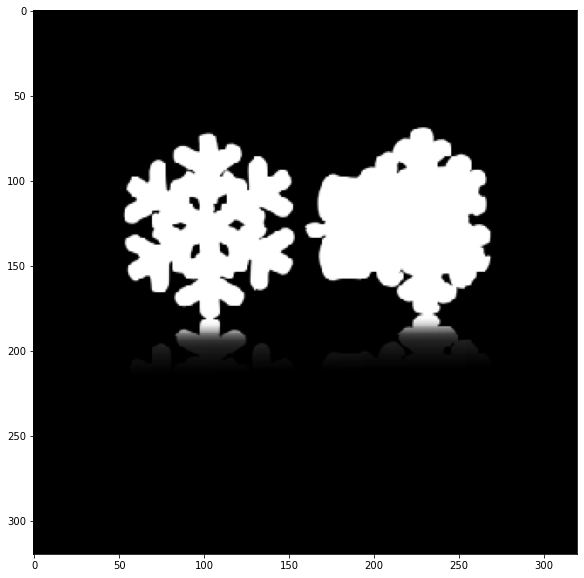

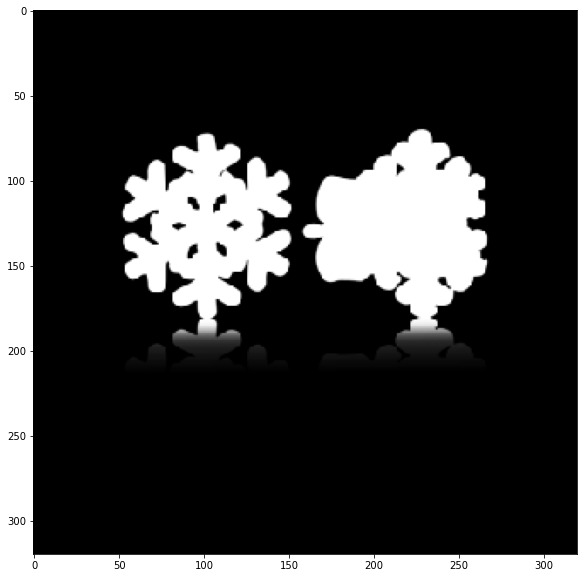

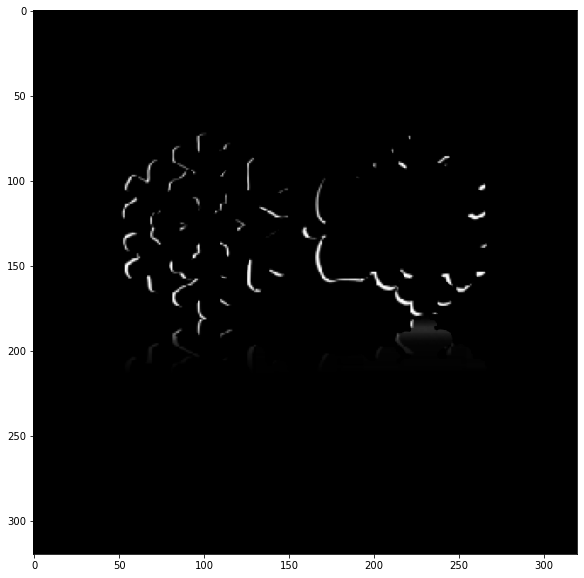

type_label <class 'numpy.ndarray'>
image_shape (400, 400, 3)
label_shape (400, 400, 1)
image_shape (400, 400, 3)
prior_shape (400, 400, 1)
label_shape (400, 400, 1)
inputs_shape torch.Size([1, 320, 320, 4])
labels_shape torch.Size([1, 320, 320, 1])
prior_shape torch.Size([320, 320, 1])
inputs_shape torch.Size([1, 320, 320, 4])


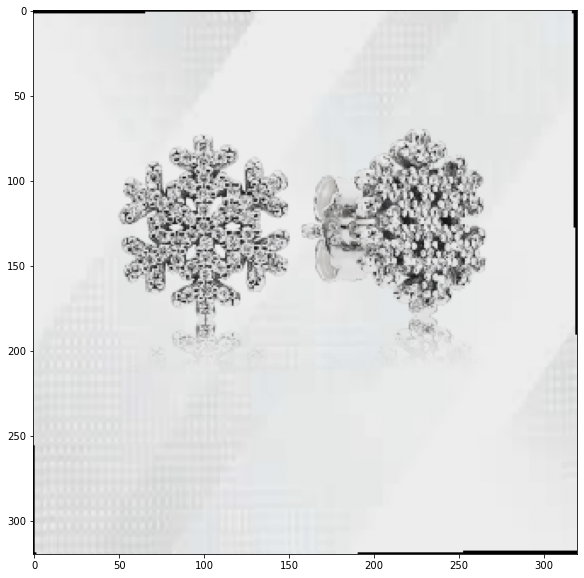

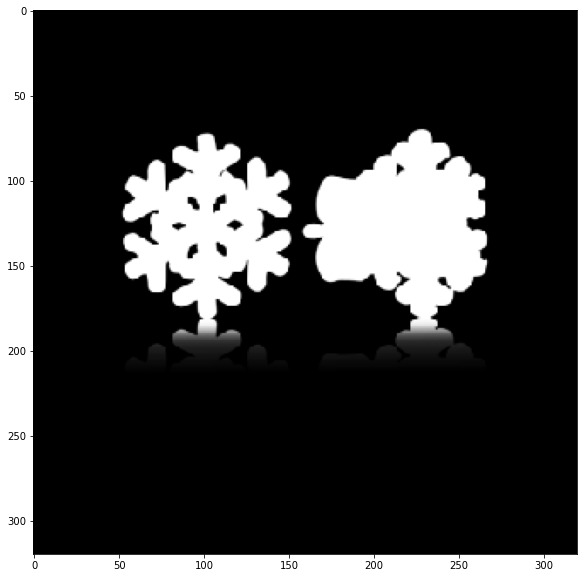

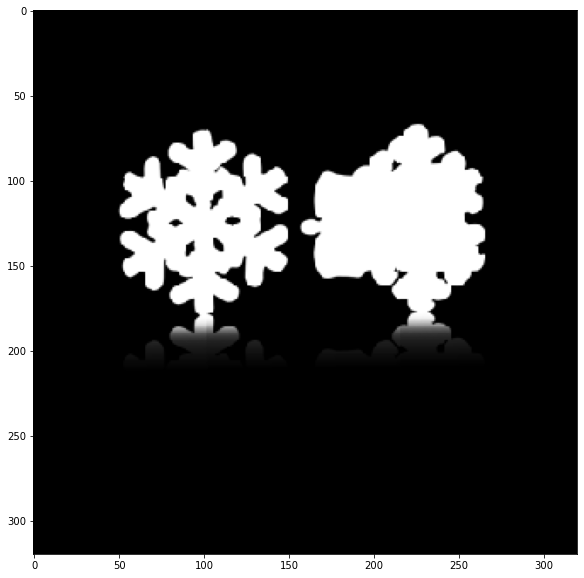

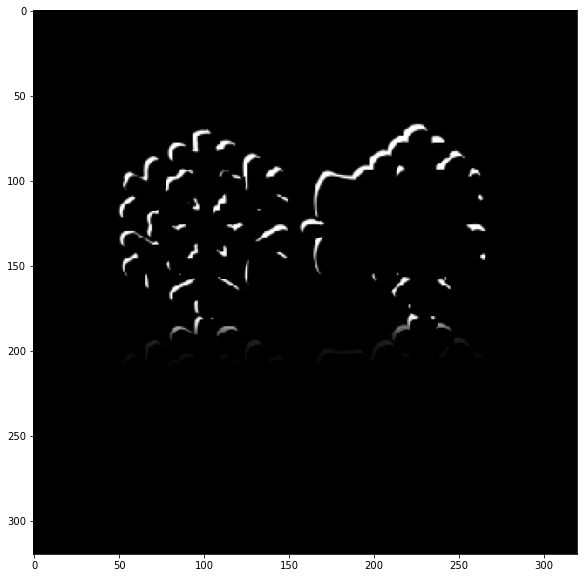

type_label <class 'numpy.ndarray'>
image_shape (400, 400, 3)
label_shape (400, 400, 1)
image_shape (400, 400, 3)
prior_shape (400, 400, 1)
label_shape (400, 400, 1)
inputs_shape torch.Size([1, 320, 320, 4])
labels_shape torch.Size([1, 320, 320, 1])
prior_shape torch.Size([320, 320, 1])
inputs_shape torch.Size([1, 320, 320, 4])


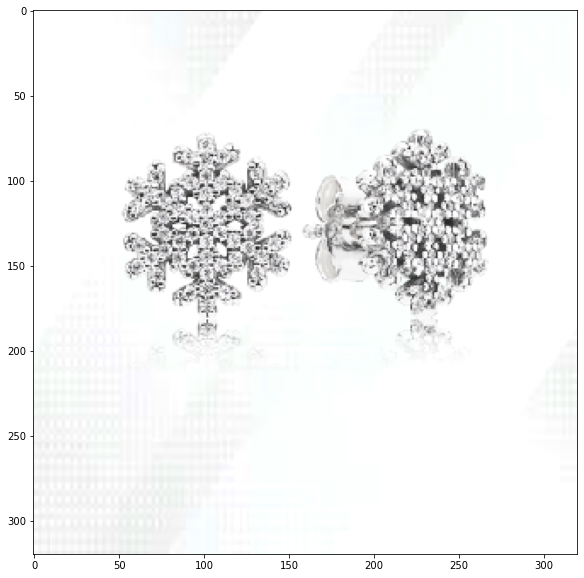

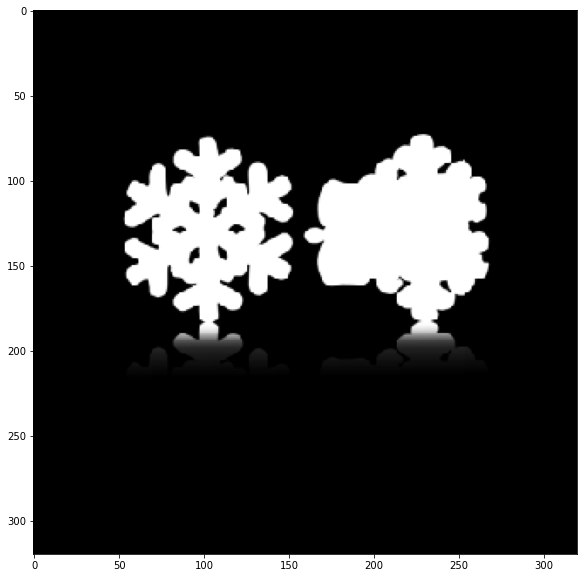

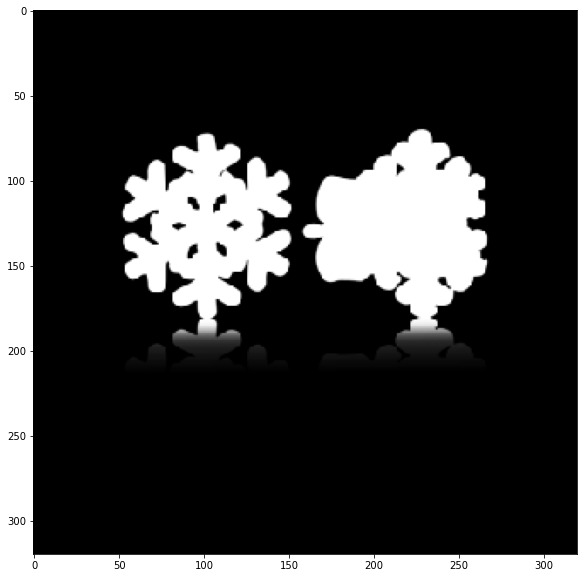

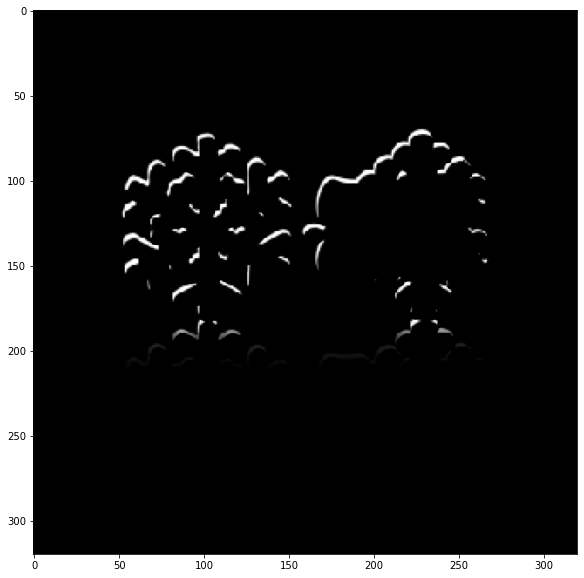

type_label <class 'numpy.ndarray'>
image_shape (400, 400, 3)
label_shape (400, 400, 1)
image_shape (400, 400, 3)
prior_shape (400, 400, 1)
label_shape (400, 400, 1)
inputs_shape torch.Size([1, 320, 320, 4])
labels_shape torch.Size([1, 320, 320, 1])
prior_shape torch.Size([320, 320, 1])
inputs_shape torch.Size([1, 320, 320, 4])


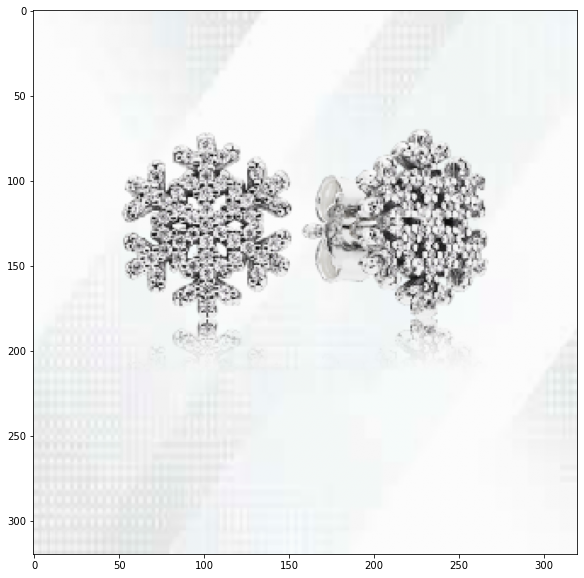

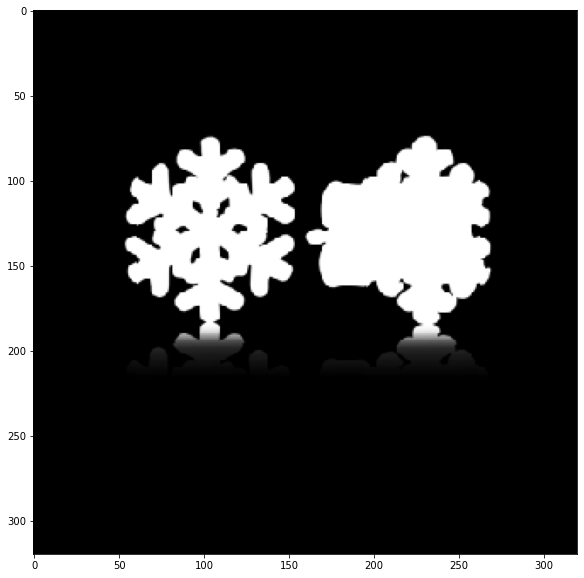

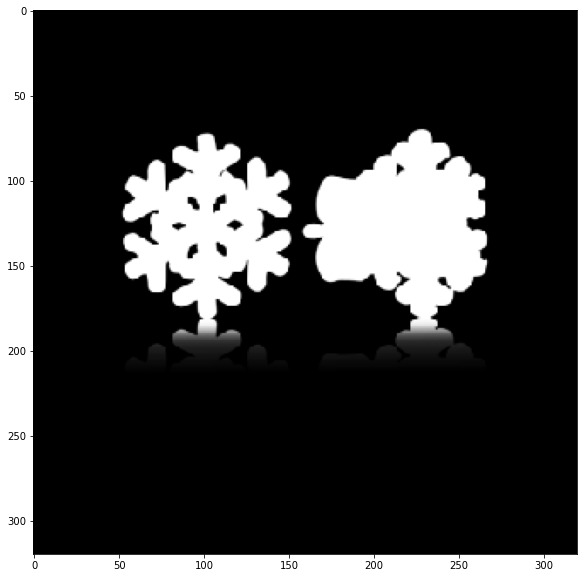

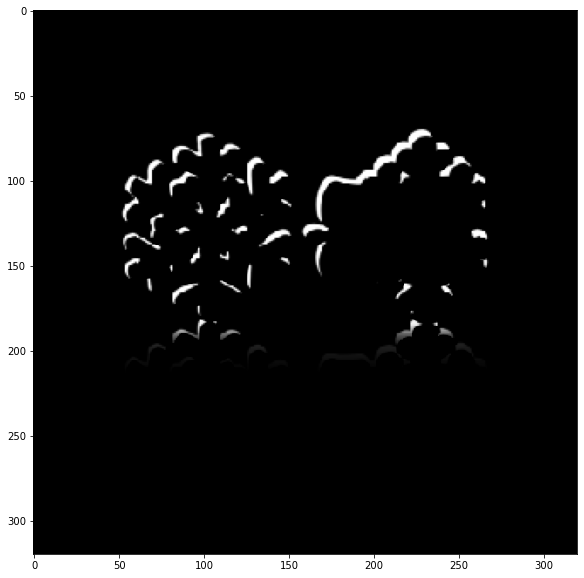

type_label <class 'numpy.ndarray'>
image_shape (400, 400, 3)
label_shape (400, 400, 1)
image_shape (400, 400, 3)
prior_shape (400, 400, 1)
label_shape (400, 400, 1)
inputs_shape torch.Size([1, 320, 320, 4])
labels_shape torch.Size([1, 320, 320, 1])
prior_shape torch.Size([320, 320, 1])
inputs_shape torch.Size([1, 320, 320, 4])


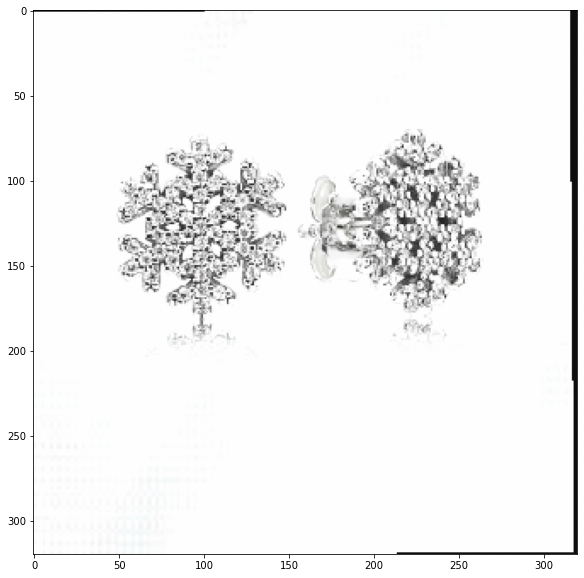

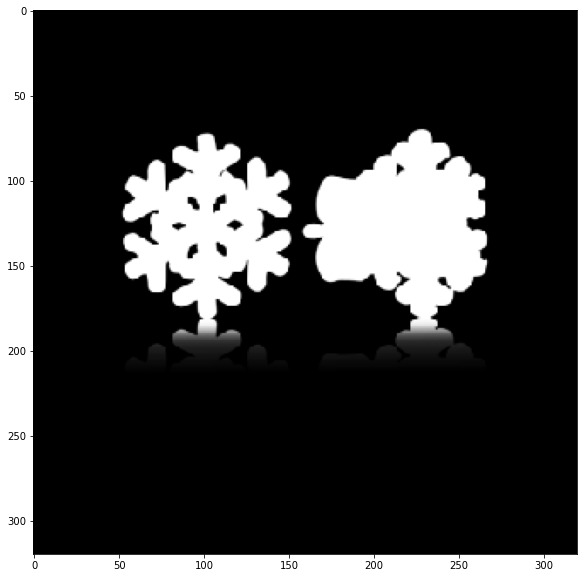

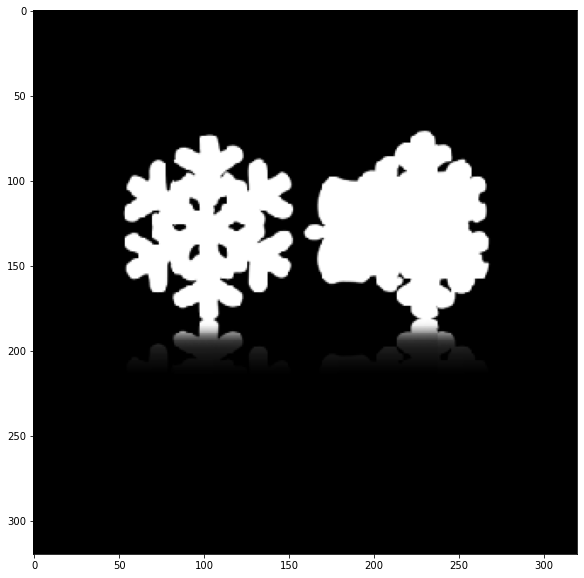

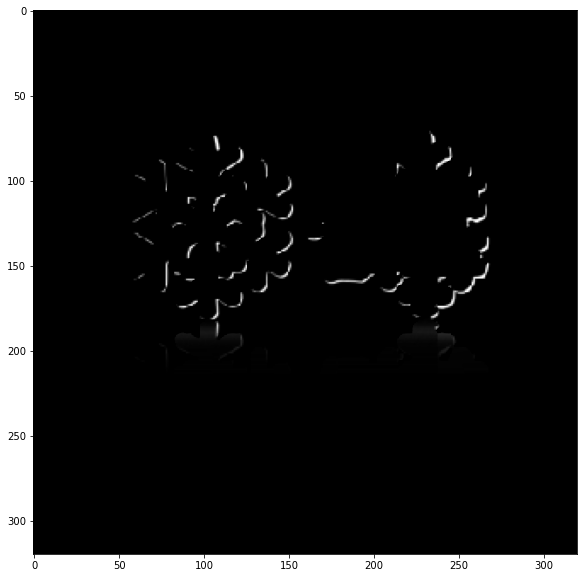

type_label <class 'numpy.ndarray'>
image_shape (400, 400, 3)
label_shape (400, 400, 1)
image_shape (400, 400, 3)
prior_shape (400, 400, 1)
label_shape (400, 400, 1)
inputs_shape torch.Size([1, 320, 320, 4])
labels_shape torch.Size([1, 320, 320, 1])
prior_shape torch.Size([320, 320, 1])
inputs_shape torch.Size([1, 320, 320, 4])


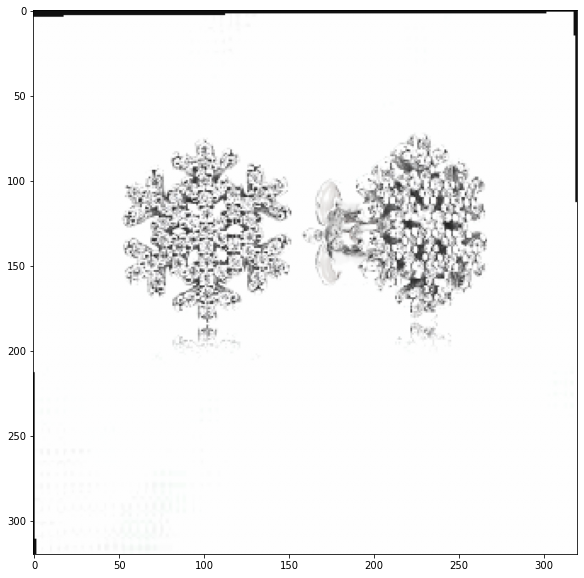

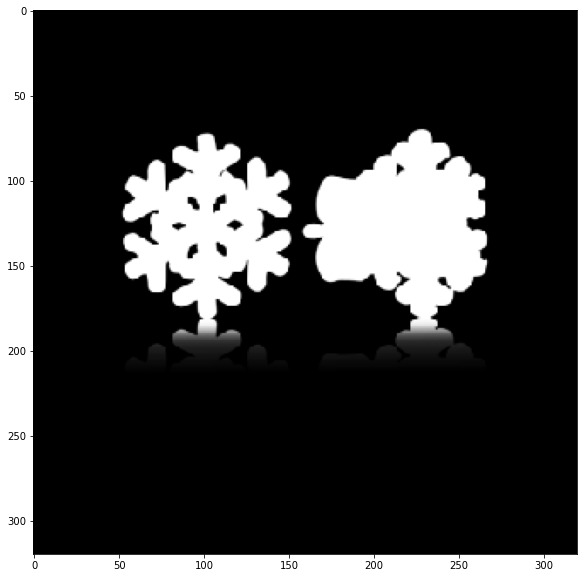

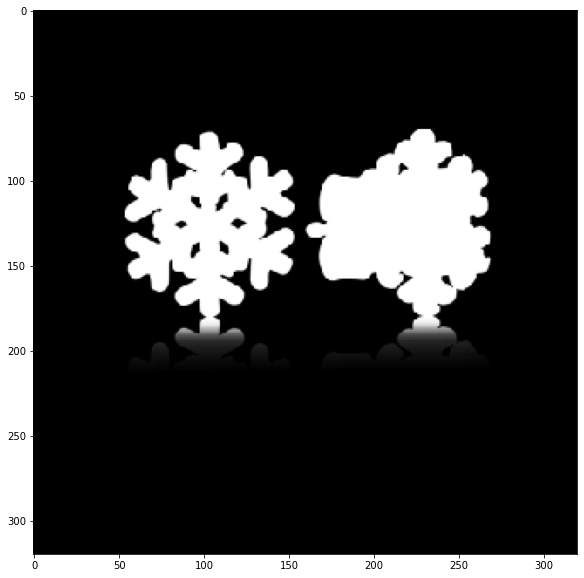

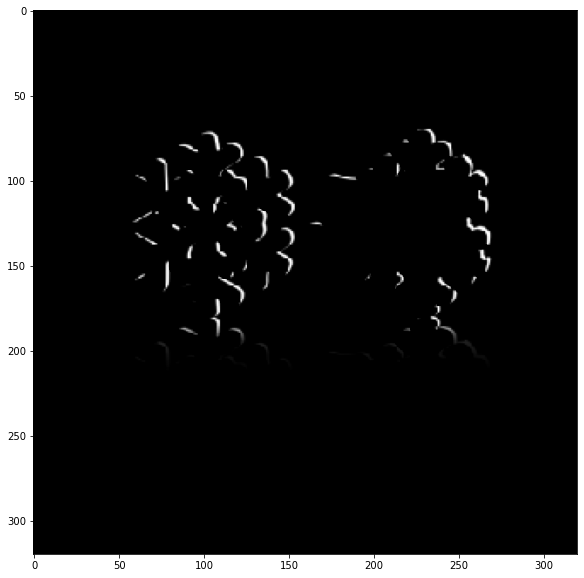

type_label <class 'numpy.ndarray'>
image_shape (400, 400, 3)
label_shape (400, 400, 1)
image_shape (400, 400, 3)
prior_shape (400, 400, 1)
label_shape (400, 400, 1)
inputs_shape torch.Size([1, 320, 320, 4])
labels_shape torch.Size([1, 320, 320, 1])
prior_shape torch.Size([320, 320, 1])
inputs_shape torch.Size([1, 320, 320, 4])


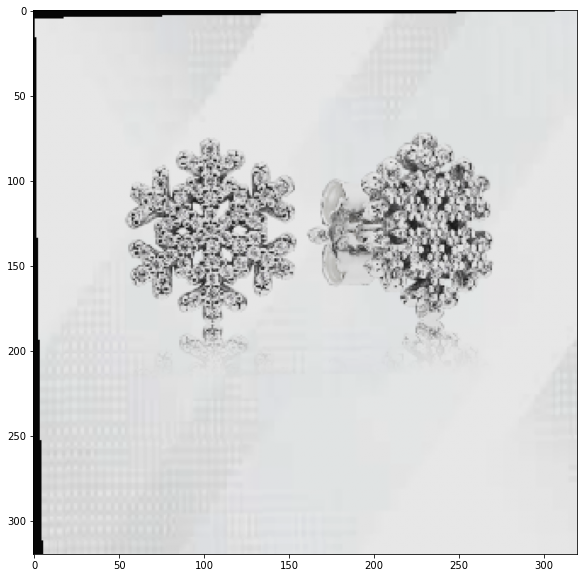

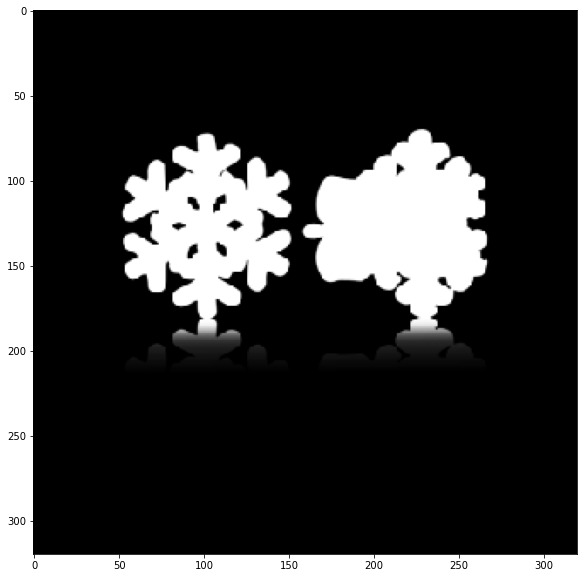

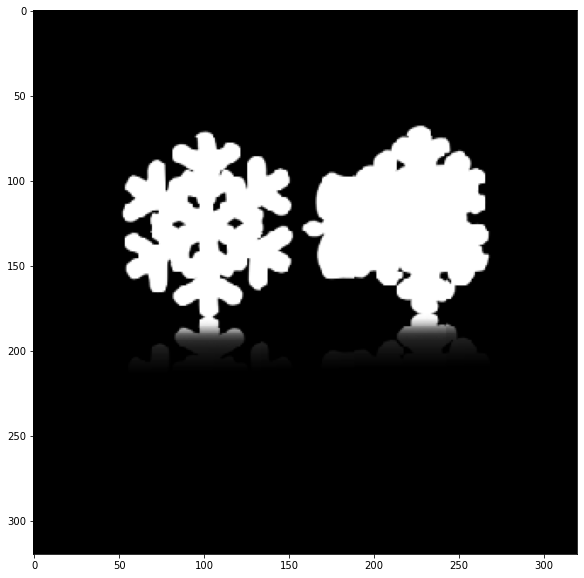

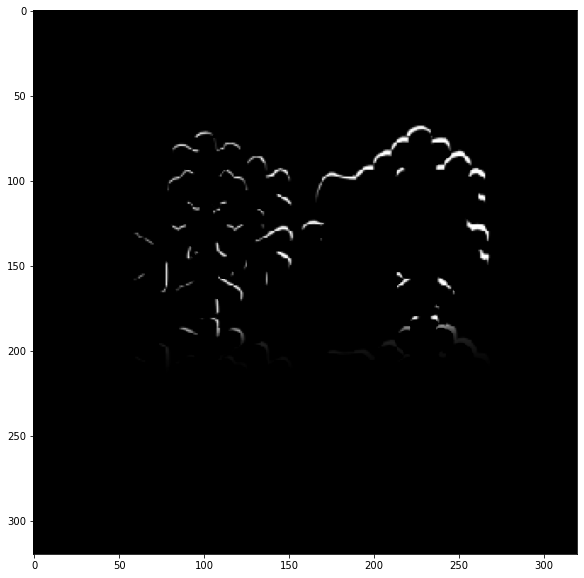

type_label <class 'numpy.ndarray'>
image_shape (400, 400, 3)
label_shape (400, 400, 1)
image_shape (400, 400, 3)
prior_shape (400, 400, 1)
label_shape (400, 400, 1)
inputs_shape torch.Size([1, 320, 320, 4])
labels_shape torch.Size([1, 320, 320, 1])
prior_shape torch.Size([320, 320, 1])
inputs_shape torch.Size([1, 320, 320, 4])


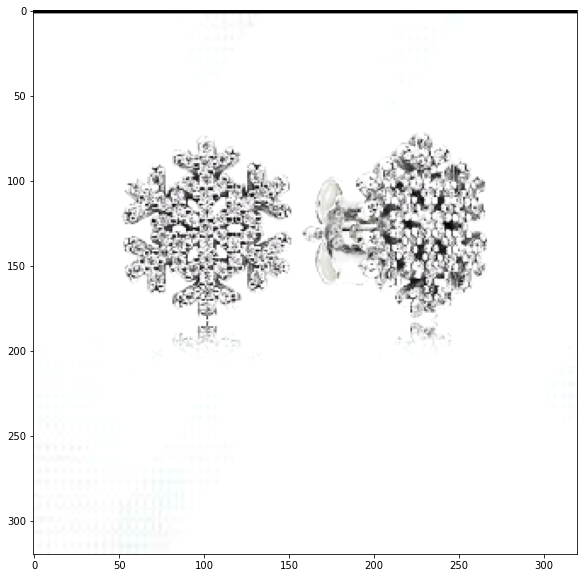

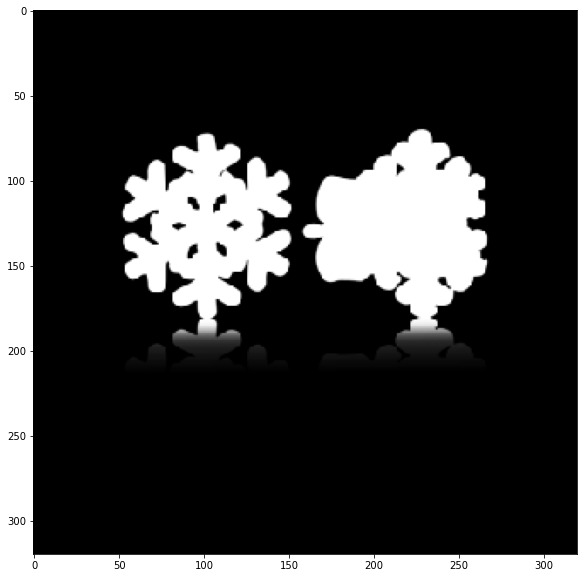

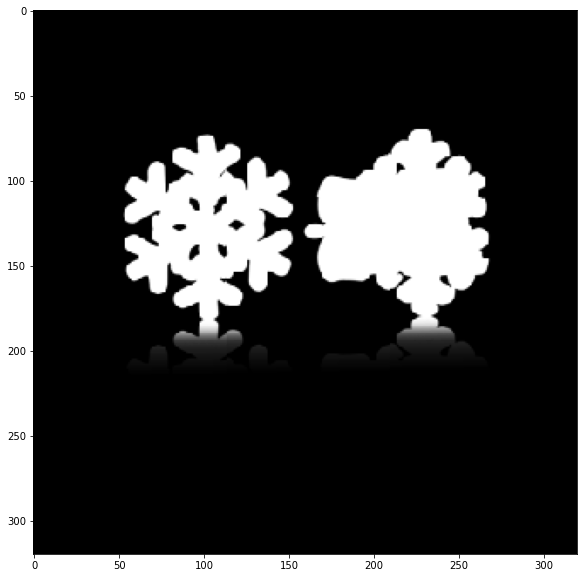

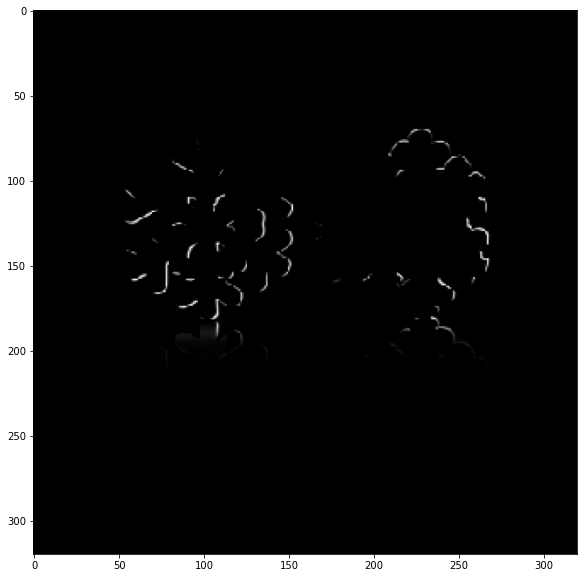

type_label <class 'numpy.ndarray'>
image_shape (400, 400, 3)
label_shape (400, 400, 1)
image_shape (400, 400, 3)
prior_shape (400, 400, 1)
label_shape (400, 400, 1)
inputs_shape torch.Size([1, 320, 320, 4])
labels_shape torch.Size([1, 320, 320, 1])
prior_shape torch.Size([320, 320, 1])
inputs_shape torch.Size([1, 320, 320, 4])


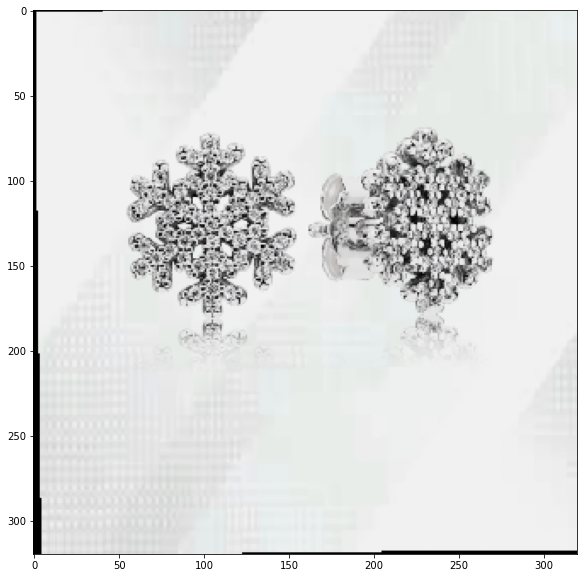

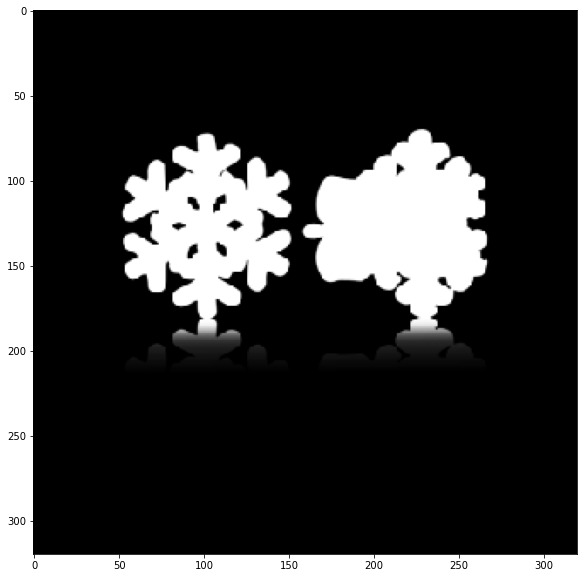

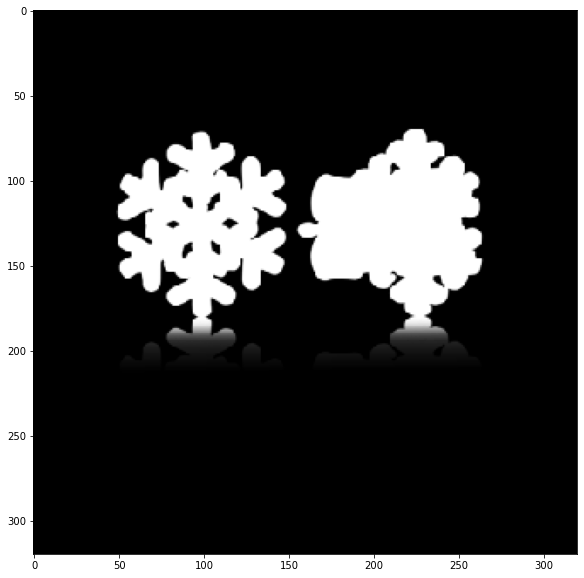

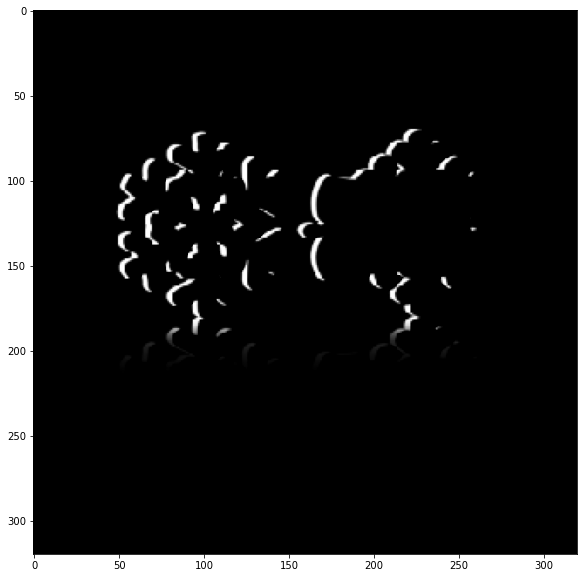

type_label <class 'numpy.ndarray'>
image_shape (400, 400, 3)
label_shape (400, 400, 1)
image_shape (400, 400, 3)
prior_shape (400, 400, 1)
label_shape (400, 400, 1)
inputs_shape torch.Size([1, 320, 320, 4])
labels_shape torch.Size([1, 320, 320, 1])
prior_shape torch.Size([320, 320, 1])
inputs_shape torch.Size([1, 320, 320, 4])


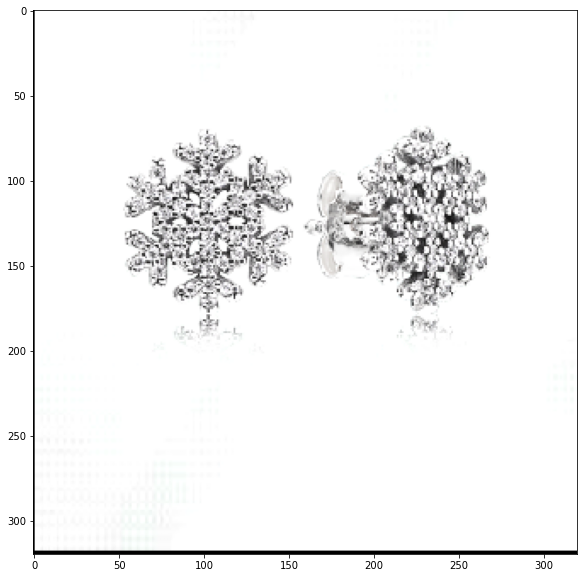

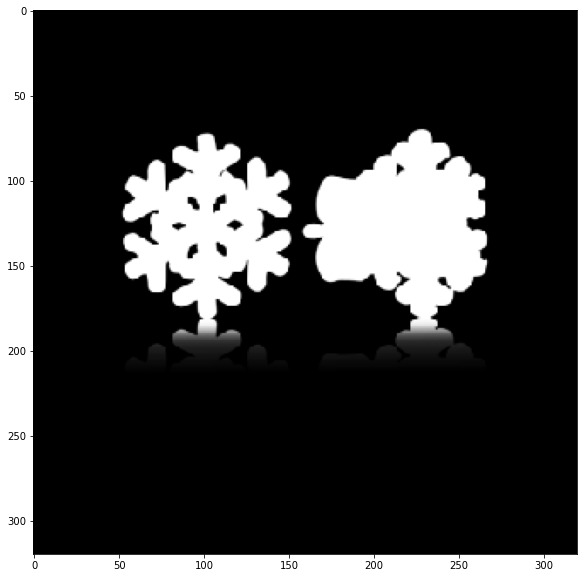

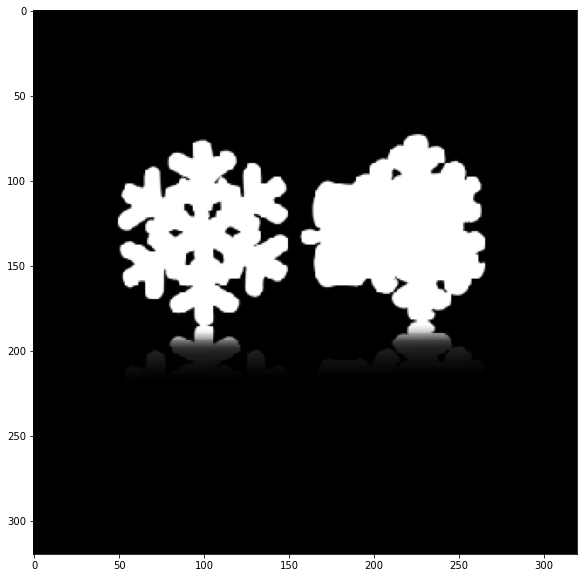

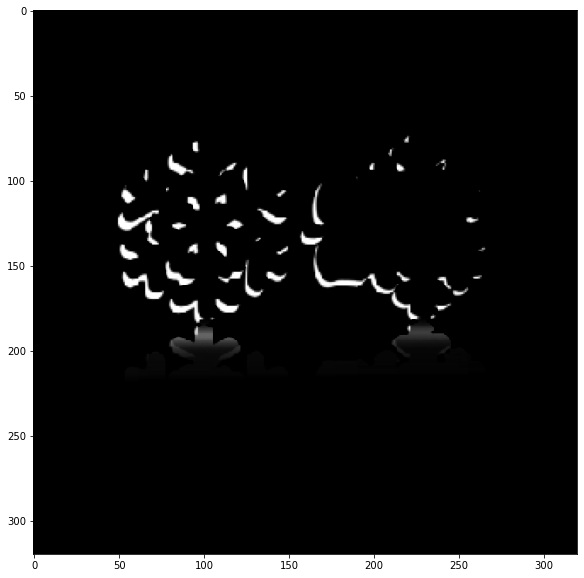

type_label <class 'numpy.ndarray'>
image_shape (400, 400, 3)
label_shape (400, 400, 1)
image_shape (400, 400, 3)
prior_shape (400, 400, 1)
label_shape (400, 400, 1)
inputs_shape torch.Size([1, 320, 320, 4])
labels_shape torch.Size([1, 320, 320, 1])
prior_shape torch.Size([320, 320, 1])
inputs_shape torch.Size([1, 320, 320, 4])


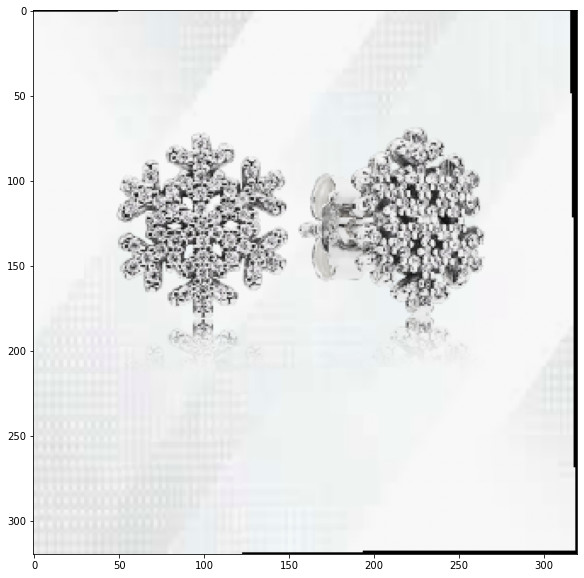

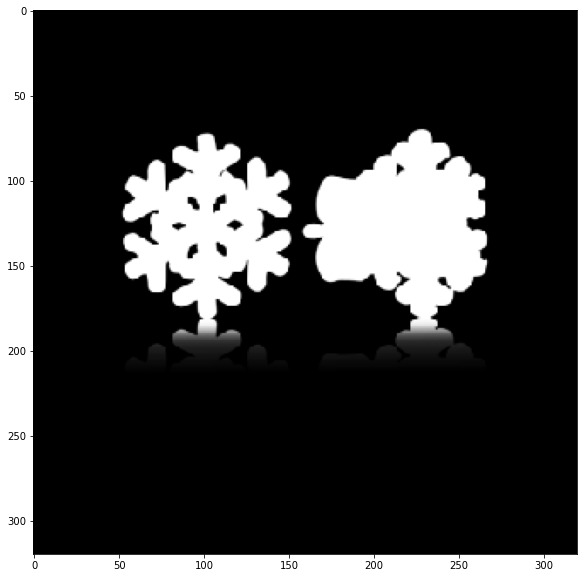

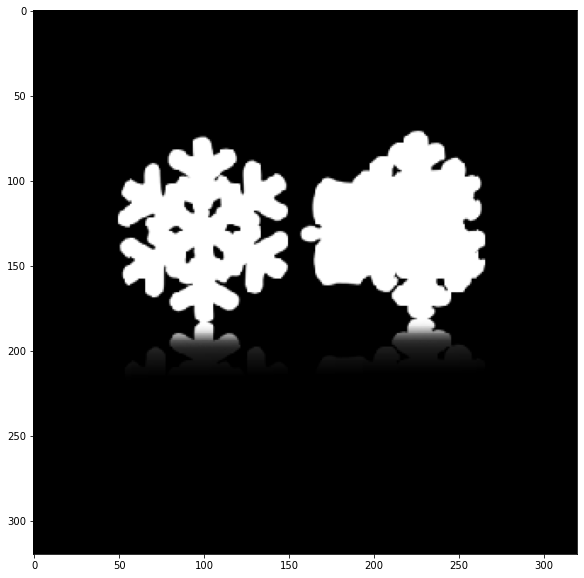

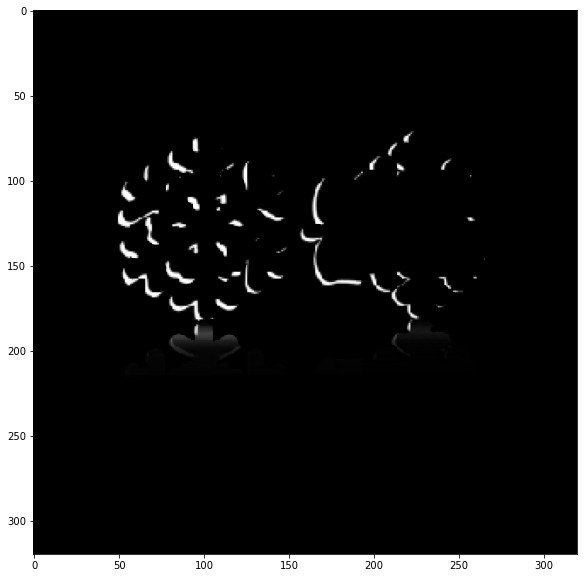

type_label <class 'numpy.ndarray'>
image_shape (400, 400, 3)
label_shape (400, 400, 1)
image_shape (400, 400, 3)
prior_shape (400, 400, 1)
label_shape (400, 400, 1)
inputs_shape torch.Size([1, 320, 320, 4])
labels_shape torch.Size([1, 320, 320, 1])
prior_shape torch.Size([320, 320, 1])
inputs_shape torch.Size([1, 320, 320, 4])


KeyboardInterrupt: 

In [5]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=10,10
import pylab

# % matplotlib inline
for k in range(20):
    for i, data in enumerate(salobj_dataloader):
    #     ite_num = ite_num + 1
    #     ite_num4val = ite_num4val + 1

        inputs, labels = data['image'], data['label']

        print('inputs_shape', inputs.shape)
        print('labels_shape', labels.shape)

    #     inputs = np.transpose(inputs[0,:3,:,:]*255.0, (1, 2, 0))[:,:,::-1]+128.0

        inputs_3_channels = inputs[0,:,:,:3]
    #     prior = np.transpose(inputs[0,3:,:,:], (1, 2, 0))

        prior = inputs[0,:,:,3:]
        print('prior_shape', prior.shape)

#         labels = labels

        print('inputs_shape', inputs.shape)
    #     print('labels.shape', labels.shape)

        plt.imshow(inputs_3_channels)
        plt.show()

        plt.imshow(prior[:,:,0], cmap='gray', vmin=0, vmax=1)
        plt.show()

        plt.imshow(labels[0,:,:,0], cmap='gray', vmin=0, vmax=1)
#         plt.imshow(labels[0][0], cmap='gray', vmin=0, vmax=1)
        plt.show()
        
        
        plt.imshow(labels[0,:,:,0] - prior[:,:,0], cmap='gray', vmin=0, vmax=1)
#         plt.imshow(labels[0][0] - prior[0], cmap='gray', vmin=0, vmax=1)
        plt.show()


In [ ]:
#BackUp

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=10,10
import pylab

# % matplotlib inline
for k in range(20):
    for i, data in enumerate(salobj_dataloader):
    #     ite_num = ite_num + 1
    #     ite_num4val = ite_num4val + 1

        inputs, labels = data['image'], data['label']

        print('inputs_shape', inputs.shape)
    #     print('labels.shape', labels.shape)

    #     inputs = np.transpose(inputs[0,:3,:,:]*255.0, (1, 2, 0))[:,:,::-1]+128.0

        inputs_3_channels = np.transpose(inputs[0,:3,:,:], (1, 2, 0))
    #     prior = np.transpose(inputs[0,3:,:,:], (1, 2, 0))

        prior = inputs[0,3:,:,:]
        print('prior_shape', prior.shape)

        labels = labels

        print('inputs_shape', inputs.shape)
    #     print('labels.shape', labels.shape)

#         plt.imshow(inputs_3_channels)
#         plt.show()

#         plt.imshow(prior[0], cmap='gray', vmin=0, vmax=1)
#         plt.show()

#         plt.imshow(labels[0][0], cmap='gray', vmin=0, vmax=1)
#         plt.show()

        plt.imshow(labels[0][0] - prior[0], cmap='gray', vmin=0, vmax=1)
        plt.show()


In [ ]:
height = 400
width = 400
ratio = 0.05

bias = np.random.randint(-int(height*ratio),int(width*ratio), 12)
# bias = np.random.randint(0, int(width*ratio), 12)


# pts1 = np.float32([[0+bias[0], 0+bias[1]], [width+bias[2], 0+bias[3]], [0+bias[4], height+bias[5]]])
# pts2 = np.float32([[0+bias[6], 0+bias[7]], [width+bias[8], 0+bias[9]], [0+bias[10], height+bias[11]]])
pst = map(abs, [[0+bias[0], 0+bias[1]], [width+bias[2], 0+bias[3]], [0+bias[4], height+bias[5]]])
pts1 = pst
pts2 = map(abs, [[0+bias[6], 0+bias[7]], [width+bias[8], 0+bias[9]], [0+bias[10], height+bias[11]]])

In [11]:
pts1

In [ ]:
# exp_args = edict()
# exp_args.task = 'seg'
# # ['eg1800', 'supervisely', 'supervisely_face_easy', 'supervisely_face_difficult', 'ATR', 'MscocoBackground']
# exp_args.datasetlist = ['eg1800'] 

# exp_args.input_height = 224
# exp_args.input_width = 224
# exp_args.stride_seg = 1
# exp_args.istrain = True
# exp_args.addEdge = True
# exp_args.stability = True

# exp_args.padding_color = 128
# exp_args.img_scale = 1
# exp_args.img_mean = [128, 128, 128] # BGR
# exp_args.img_val = [255, 255, 255] # BGR

# exp_args.video = True
# exp_args.prior_prob = 0.5

# dataset = Human(exp_args)
# print ("len(dataset): ", len(dataset))

# iterations = 10
# for i in range(0, 0+iterations):
#     input_ori, input, output_edge, output_mask = dataset[i]
#     print ("input_ori shape: ", input_ori.shape)
#     print ("output_edge: ", output_edge.shape )
#     print ("output_mask: ", output_mask.shape )

#     import matplotlib
#     import matplotlib.pyplot as plt
#     import pylab
#     % matplotlib inline

#     if len(np.unique(output_mask)) > 0:

#         fig = matplotlib.pyplot.gcf()
#         fig.set_size_inches(10,10)

#         if exp_args.video == True:
#             prior = input_ori[3,:,:]

#         img_ori = np.transpose(input_ori[:3,:,:]*255.0, (1, 2, 0))[:,:,::-1]+128.0
#         plt.subplot(1,5,1)
#         plt.imshow(img_ori/255.0)

#         img = np.transpose(input[:3,:,:]*255.0, (1, 2, 0))[:,:,::-1]+128.0
#         plt.subplot(1,5,2)
#         plt.imshow(img/255.0)

#         if exp_args.video == True:
#             plt.subplot(1,5,3)
#             plt.imshow(prior*255)

#         plt.subplot(1,5,4)
#         plt.imshow(output_edge*255)

#         # output_mask[output_mask==255] = 2
#         plt.subplot(1,5,5)
#         plt.imshow(output_mask)

#         plt.show()